# Project 2
## Aviraj Sinha and Cole Ogden

### 1. Business Understanding (20 points total).  
  `[20 points] Give an overview of the dataset. 
    Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). 
    What is the prediction task for your dataset and which third parties would be interested in the results? 
    Why is this data important? 
    Once you begin modeling, how well would your prediction algorithm need to perform to be considered useful to the identified third parties? Be specific and use your own words to describe the aspects of the data. `

>stl-10 dataset was used https://cs.stanford.edu/~acoates/stl10/ same set can also be found on kaggle

For our dataset, we selected a group of images to detect the presence of a live animal in the image. We utilized this as a practical application for animal tracking, recognition, and detection.

When evaluating our dataset predictions, we set out to predict their presence for animal tracking services, namely a TV series such as Planet Earth, which depends heaviliy on capturing the moment when an animal appears on screen. Their cameramen wait weeks of inspecting cameras placed around to capture the 2 minutes that will be potent* enough to make it on screen.
![image.png](attachment:image.png)

In [1]:
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from skimage.color import rgb2gray
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import glob
import random


### 2. Data Preparation

#### 2.1 Read in your images as numpy arrays. Resize and recolor images as necessary.`

In [2]:
images = []
for filename in glob.glob('./Image_Sample/*.png'):
    img = mpimg.imread(f'{filename}')
    images.append(rgb2gray(img))
print("number of images", len(images))

number of images 1000


#### 2.2 Linearize the images to create a table of 1-D image features (each row should be one image).

In [3]:
##each row is in its own right now so we must flatten
h, w = images[0].shape
print("dim:",h,w)
#each pixel now has a value
print("pixels:", len(images[0].flatten()))

images_features = []
for image in images:
    images_features.append(image.flatten())

dim: 96 96
pixels: 9216


#### 2.3 Visualize several images.

> using the gallery class example

Resized and recolored images


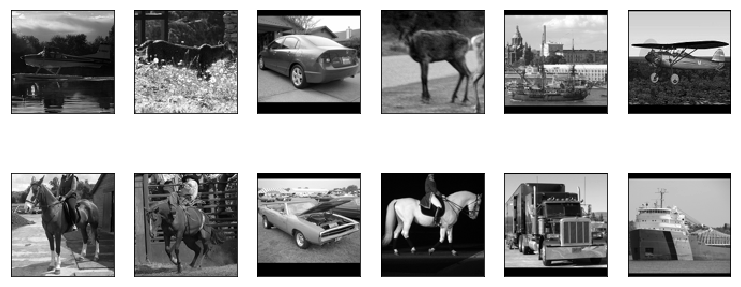

In [4]:
def plot_gallery(images , h, w, n_row=3, n_col=6):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(len(images)):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)

        plt.xticks(())
        plt.yticks(())
        
print("Resized and recolored images")
plot_gallery(images_features[:12], h, w)        

### 3. Data Reduction 

#### 3.1 Perform linear dimensionality reduction of the images using principal components analysis. 


>manipulated from Sebastian Raschka Example

In [34]:
def plot_explained_variance(pca):
    import plotly
    from plotly.graph_objs import Bar, Line
    from plotly.graph_objs import Scatter, Layout
    from plotly.graph_objs.scatter import Marker
    from plotly.graph_objs.layout import XAxis, YAxis
    plotly.offline.init_notebook_mode() # run at the start of every notebook

    explained_var = pca.explained_variance_ratio_
    cum_var_exp = np.cumsum(explained_var)

    plotly.offline.iplot({
        "data": [Bar(y=explained_var, name='individual explained variance'),
                 Scatter(y=cum_var_exp, name='cumulative explained variance')
            ],
        "layout": Layout(xaxis=XAxis(title='Principal components'), yaxis=YAxis(title='Explained variance ratio'))
    })



n_components = 300
pca = PCA(n_components=n_components)
X= images_features
pca.fit(X.copy())
plot_explained_variance(pca)



lin_dim_eig = pca.components_.reshape((n_components, h, w))

pca = PCA(n_components=50)
pca.fit(X.copy())


PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Visualize the explained variance of each component. Analyze how many dimensions are required to adequately represent your image data.
Explain your analysis and conclusion.

Eigenvectors


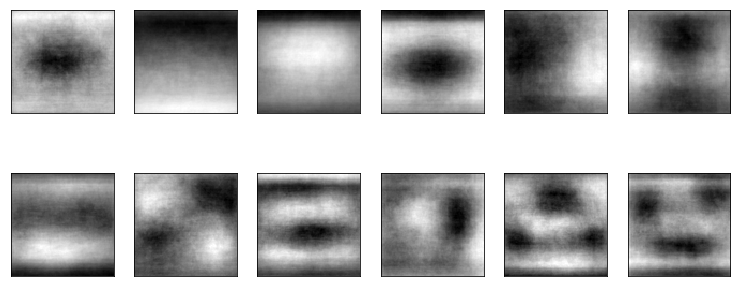

In [28]:
print("Eigenvectors")
plot_gallery(lin_dim_eig[:12], h, w)

#### 3.2 Perform non-linear dimensionality reduction of your image data.

In [36]:
n_components = 50

kpca = KernelPCA(n_components=n_components, kernel='rbf',
                fit_inverse_transform=True, gamma=12, # very sensitive to the gamma parameter,
                remove_zero_eig=True)
kpca.fit(X.copy())


kpca_transform = kpca.fit_transform(X)
explained_variance = np.var(kpca_transform, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)
print(f"Explained variance ratio {explained_variance_ratio} \nTotal Explained variance {np.sum(explained_variance)}")

Explained variance ratio [0.02272727 0.02272727 0.02272727 0.02272727 0.02272727 0.02272727
 0.02272727 0.02272727 0.02272727 0.02272727 0.02272727 0.02272727
 0.02272727 0.         0.         0.02272727 0.02272727 0.02272727
 0.02272727 0.02272727 0.02272727 0.02272727 0.02272727 0.02272727
 0.02272727 0.02272727 0.02272727 0.02272727 0.02272727 0.02272727
 0.02272727 0.02272727 0.02272727 0.02272727 0.02272727 0.
 0.02272727 0.02272727 0.02272727 0.         0.         0.
 0.02272727 0.02272727 0.02272727 0.02272727 0.02272727 0.02272727
 0.02272727 0.02272727] 
Total Explained variance 0.044000000000000275


Visualize the explained variance of each component. Analyze how many dimensions are required to adequately represent your image data.
Explain your analysis and conclusion.

#### 3.3 Compare the representation using non-linear dimensions to using linear dimensions. 

> based on example from scikit http://scikit-image.org/docs/dev/auto_examples/transform/plot_ssim.html

/home/aviraj/anaconda3/lib/python3.6/site-packages/skimage/util/arraycrop.py:177: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



<Figure size 720x360 with 0 Axes>

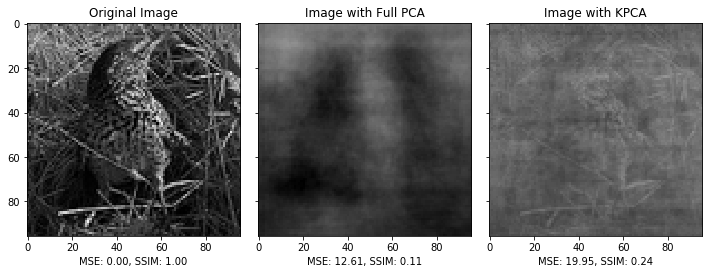

<Figure size 720x360 with 0 Axes>

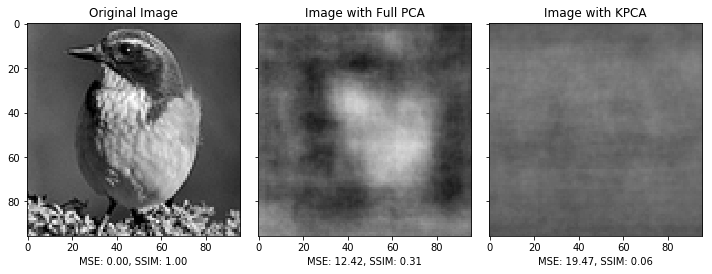

<Figure size 720x360 with 0 Axes>

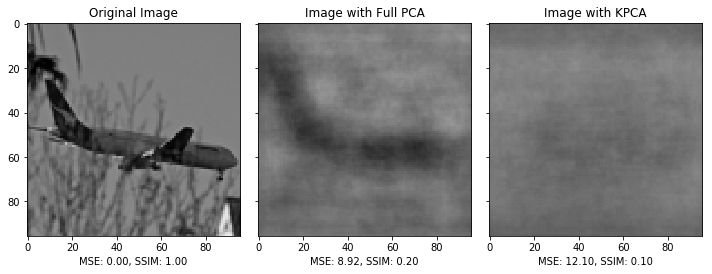

Kernal PCA structural similarity percent win: 0.16666666666666666


In [37]:


from skimage import data, img_as_float
from skimage.measure import compare_ssim as ssim

def mse(x, y):
    return np.linalg.norm(x - y)


idx_to_reconstruct = 3

def reconstruct_comp(idx_to_reconstruct, plot):

    original = X[idx_to_reconstruct]
    reconstructed_image = pca.inverse_transform(pca.transform(X[idx_to_reconstruct].reshape(1, -1)))
    kpca.fit(X.copy())
    reconstructed_image_kpca = kpca.inverse_transform(kpca.transform(X[idx_to_reconstruct].reshape(1, -1)))

    img = original.reshape((h, w))
    full = reconstructed_image.reshape((h, w))
    kpca_image = reconstructed_image_kpca.reshape((h, w))

    rows, cols = img.shape


    mse_none = mse(img, img)
    ssim_none = ssim(img, img, data_range=img.max() - img.min())

    mse_full = mse(img, full)
    ssim_full = ssim(img, full,
                      data_range=full.max() - full.min())

    mse_kpca = mse(img, kpca_image)
    ssim_kpca = ssim(img, kpca_image,
                      data_range=kpca_image.max() - kpca_image.min())




    if plot:
        plt.figure(figsize=(10,5))
        fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4),
                                 sharex=True, sharey=True)
        ax = axes.ravel()

        label = 'MSE: {:.2f}, SSIM: {:.2f}'

        ax[0].imshow(img, cmap=plt.cm.gray, vmin=0, vmax=1)
        ax[0].set_xlabel(label.format(mse_none, ssim_none))
        ax[0].set_title('Original Image')

        ax[1].imshow(full, cmap=plt.cm.gray, vmin=0, vmax=1)
        ax[1].set_xlabel(label.format(mse_full, ssim_full))
        ax[1].set_title('Image with Full PCA')

        ax[2].imshow(kpca_image, cmap=plt.cm.gray, vmin=0, vmax=1)
        ax[2].set_xlabel(label.format(mse_kpca, ssim_kpca))
        ax[2].set_title('Image with KPCA')

        plt.tight_layout()
        plt.show()
        
    return (ssim_full, ssim_kpca)
   


#for showing example
for i in random.sample(range(len(X)), 3):
    score = reconstruct_comp(i, True)

#to compare which is better
kpca_win_count = 0
sample_test = 30
close = 0
for i in random.sample(range(len(X)), sample_test):
    score = reconstruct_comp(i, False)
    if score[1]>score[0]:
        kpca_win_count += 1        
    
print("Kernal PCA structural similarity percent win:", kpca_win_count/(1.0*sample_test))

The mean squared error is irrelevant due to it not capturing the structure and only the color value.

The method you choose to compare dimensionality methods should quantitatively explain which method is better at representing the images with fewer components. Be aware that mean-squared error may not be a good measurement for kPCA.  Do you prefer one method over another? Why?

/home/aviraj/anaconda3/lib/python3.6/site-packages/skimage/util/arraycrop.py:177: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



<Figure size 720x360 with 0 Axes>

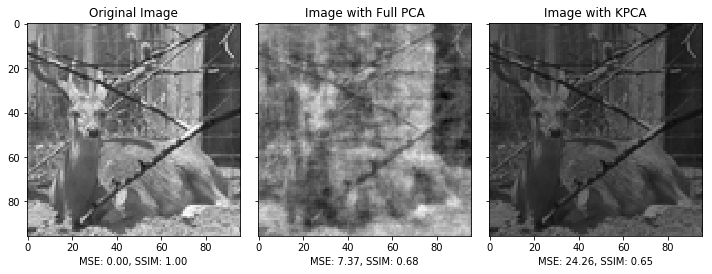

<Figure size 720x360 with 0 Axes>

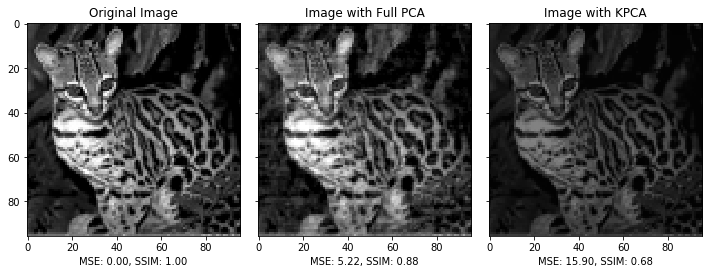

<Figure size 720x360 with 0 Axes>

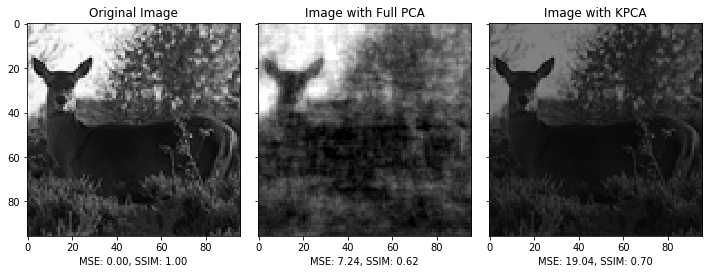

Kernal PCA structural similarity percent win: 0.6666666666666666


In [38]:
pca = PCA(n_components=300)
pca.fit(X.copy())

n_components = 300

kpca = KernelPCA(n_components=n_components, kernel='rbf',
                fit_inverse_transform=True, gamma=12, # very sensitive to the gamma parameter,
                remove_zero_eig=True)
kpca.fit(X.copy())

#for showing example
for i in random.sample(range(len(X)), 3):
    score = reconstruct_comp(i, True)

#to compare which is better
kpca_win_count = 0
sample_test = 30
close = 0
for i in random.sample(range(len(X)), sample_test):
    score = reconstruct_comp(i, False)
    if score[1]>score[0]:
        kpca_win_count += 1        
    
print("Kernal PCA structural similarity percent win:", kpca_win_count/(1.0*sample_test))

Kernal better for higher level component that are better, linear better for lower levels.

#### 3.4

    `[10 points] Perform feature extraction upon the images using any feature extraction technique (e.g., gabor filters, ordered gradients, DAISY, etc.).`

#### 3.5

        [20 points] Does this feature extraction method show promise for your prediction task? Why? Use visualizations to analyze this questions. For example, visualize the differences between statistics of extracted features in each target class. Another option, use a heat map of the pairwise differences (ordered by class) among all extracted features. Another option, build a nearest neighbor classifier to see actual classification performance.  

### Exceptional Work

`perform feature extraction upon the images using a feature extractor that requires key point matching (such as SIFT/SURF/ORB or others). Then build a nearest neighbor classifier using a method appropriate for your chosen features. You will need to investigate appropriate methods for comparisons with your chosen feature extraction technique. NOTE: this often requires some type of brute force matching per pair of images, which can be computationally expensive).`